<a href="https://colab.research.google.com/github/LamuneGitHub/A001_Python_Test/blob/main/ai15_sc41x_%EC%9D%B4%EC%83%81%ED%95%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## AI SC41x

---
# Sprint Challenge - 신경망(Neural Network) 기본기 다지기

Table of Problems

1. 신경망 정의하기 
2. 퍼셉트론 정의
    - 퍼셉트론(Perceptron)
    - 다층 퍼셉트론(Multilayer Perceptron)
    - 분석과 비교
4. Keras 사용하기

<a id="Q1"></a>
## 1. 신경망 용어 정의
### 1.1 아래에 주어진 신경망 개념에 사용 되는 용어들을 자신만의 언어로 정의해보세요
꼭 "자신의 언어"로 써보시고, 정리해보고, 요약해보세요 :)

- **Neuron:**
- **Input Layer:**
- **Hidden Layer:**
- **Output Layer:**
- **Activation Function:**
- **Back Propagation:**

### 1.2 역전파 설명해보기
이번에는 역전파 (Back Propagation)를 조금 더 디테일하게 설명해보겠습니다. 
<br> <b>초등학생</b>에게 설명한다는 생각으로 단어들을 선정해 주세요. <i>외부 자료나 이미지를 설명에 활용하셔도 좋습니다</i>.

```
AI 딥러닝은 사람의 뇌가 행동하는 것을 비슷하게 따라 하도록 만들어 졌습니다.

그래서 실제 우리 뇌가 실수나 결과를 보고 배우는 것 처럼 학습을 해요

예를 들어
아이가 흙장난을 하고 싶을 때는 옷을 더럽히면 엄마에게 혼날지 걱정이 됩니다.

머리속에서는 여러가지 생각들을 하게 될꺼에요, 오늘 엄마의 기분, 아빠가 월급을 타 오시는 날인지,  날씨, 빨래가 많았는지 , 다른 잘못 한게 없는지 등등등...

우선은 흙장난을 합니다. 그러면 엄마에게 혼이 날 수도 있고 아닐수도 있고... 조금만 혼 날 수도 있습니다. 이 결과는 학습을 하게 됩니다. 그래서 다음번에는 흙장난을 해도 엄마에게 덜 혼나는 날을 찾을 수 있게 되겟죠..  이 학습하는 과정이... 결과로 부터 학습하는 과정이 역전파 입니다. 
```


### 1.3 퍼셉트론 정의해보기
신경망 수업 첫날에 들었었던 퍼셉트론의 간단한 개념으로 예측하는 과정을 설명해보세요. <br> <b>입력</b>에서 <b>출력</b>으로 어떻게 변경되는 지 단계별로 설명해보세요.

```
퍼셉트론은 여러개의 입력을 받아 하나의 결과를 출력하는 구조 입니다.


* 입력은 1개의 편향과 n개의 입력으로 구성되어 있고
* 이 각각의 입력에 각각의 가중치가 곱해진 값의 합이 구해지게 됩니다. 
* 구해진 결과의 합은 활성화 함수에 의해서 최종 결과값이 정해지게 되는데요

활성화 함수는 ReLU , 시그모이드 , 소프트맥스 등의 함수를 사용합니다.

이 과정이 퍼셉트론의 입력 -> 출력 으로의 순전파 입니다.

```


<a id="Q2"></a>
## 2. 단순 퍼셉트론

이번에는 TensorFlow, keras를 사용하여 두 개의 신경망을 직접 구축한 뒤,
<br> 아래 임의로 제공 된 $X, y$를 이용하여 두 모델에 적용한 뒤 결과를 비교해보세요. 
먼저 사용할 데이터는 다음과 같습니다.

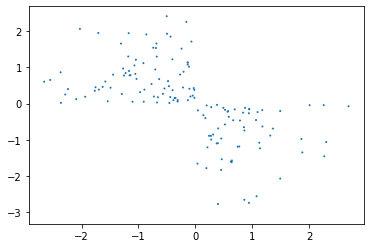

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)


"model1과 model2를 구축할 때 아래의 X & y를 사용하세요"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

plt.scatter(X[:,0], X[:,1], s=y)


In [ ]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

### 단순 퍼셉트론 구현
Keras로 <b>sigmoid activation function</b>을 포함한 dense layer 1개가 있는</b> `model1`을 만들어 학습시키고 `h1`에 저장하세요.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(1, activation='sigmoid' , input_dim=2))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
h1 = model1.fit(X,y,epochs=30)

Epoch 1/30
10/10 [==============================] - 0s 3ms/step - loss: 0.8008 - accuracy: 0.4367
Epoch 2/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7981 - accuracy: 0.4400
Epoch 3/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7957 - accuracy: 0.4367
Epoch 4/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7932 - accuracy: 0.4367
Epoch 5/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7910 - accuracy: 0.4367
Epoch 6/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7886 - accuracy: 0.4367
Epoch 7/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7863 - accuracy: 0.4367
Epoch 8/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7840 - accuracy: 0.4433
Epoch 9/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7818 - accuracy: 0.4433
Epoch 10/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7795 - accuracy: 0.4433
Epoch 11/30
10/10 [


### Multi-Layer Perceptron (MLP)
이번에는 여러층의 레이어들을 쌓은 MLP 모델을 만들어보겠습니다. 아래는 간략한 가이드입니다 :
- 2개의 은닉층 (출력 수를 맞추는 것까지 3개의 Dense를 사용할 것은 추천)
- 노드의 개수는 8-32개 내에서 변경해서 사용해보세요.
- Activation function과 optimizer는 이번 주에 배운 것들 중에서 자유롭게 골라보세요.
- 아래 만들어진 Callback function을 모델에 통합해서 사용하세요

MLP로 만들어진 `model2` 를 만들어 학습하고 `h2`에 저장하세요.

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .90):   
            self.model.stop_training = True

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(8, activation='relu' , input_dim=2))
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

fn_callback = myCallback()
h2= model2.fit(X,y,epochs=50, callbacks=[fn_callback] )




Epoch 1/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5433
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.5467
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6551 - accuracy: 0.5467
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.5800
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6303 - accuracy: 0.6400
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6177 - accuracy: 0.7000
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.6066 - accuracy: 0.7067
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5942 - accuracy: 0.7200
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.7367
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5731 - accuracy: 0.7400
Epoch 11/50
10/10 [

### Analyze and Compare

코드를 시작하기 전에 추가 라이브러리를 설치해야 합니다. 스프린트 과제에 사용 중인 환경에 패키지 `mlxtend`를 설치합니다. 설치코드를 직접 제작해보세요. 기존 자료들을 참고하면 쉽게 설치할 수 있을 것입니다. 

#### 아래 실행 버튼을 눌러 셀을 실행시킨 뒤, 진행해주세요.

In [ ]:
# mlxtend 라이브러리를 설치합니다
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#이 셀의 코드는 변경하지 마세요.
from itertools import cycle
from math import ceil, floor

import matplotlib.pyplot as plt
import numpy as np

from mlxtend.utils import check_Xy, format_kwarg_dictionaries


def get_feature_range_mask(X, filler_feature_values=None, filler_feature_ranges=None):
    """
    Function that constucts a boolean array to get rid of samples
    in X that are outside the feature range specified by filler_feature_values
    and filler_feature_ranges
    """

    if not isinstance(X, np.ndarray) or not len(X.shape) == 2:
        raise ValueError("X must be a 2D array")
    elif filler_feature_values is None:
        raise ValueError("filler_feature_values must not be None")
    elif filler_feature_ranges is None:
        raise ValueError("filler_feature_ranges must not be None")

    mask = np.ones(X.shape[0], dtype=bool)
    for feature_idx in filler_feature_ranges:
        feature_value = filler_feature_values[feature_idx]
        feature_width = filler_feature_ranges[feature_idx]
        upp_limit = feature_value + feature_width
        low_limit = feature_value - feature_width
        feature_mask = (X[:, feature_idx] > low_limit) & (X[:, feature_idx] < upp_limit)
        mask = mask & feature_mask

    return mask


def plot_decision_regions(
    X,
    y,
    clf,
    feature_index=None,
    filler_feature_values=None,
    filler_feature_ranges=None,
    ax=None,
    X_highlight=None,
    zoom_factor=1.0,
    legend=1,
    hide_spines=True,
    markers="s^oxv<>",
    colors=(
        "#1f77b4,#ff7f0e,#3ca02c,#d62728,"
        "#9467bd,#8c564b,#e377c2,"
        "#7f7f7f,#bcbd22,#17becf"
    ),
    scatter_kwargs=None,
    contourf_kwargs=None,
    contour_kwargs=None,
    scatter_highlight_kwargs=None,
):
    """Plot decision regions of a classifier.
    Please note that this functions assumes that class labels are
    labeled consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class
    labels with integer labels > 4, you may want to provide additional colors
    and/or markers as `colors` and `markers` arguments.
    See http://matplotlib.org/examples/color/named_colors.html for more
    information.
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Feature Matrix.
    y : array-like, shape = [n_samples]
        True class labels.
    clf : Classifier object.
        Must have a .predict method.
    feature_index : array-like (default: (0,) for 1D, (0, 1) otherwise)
        Feature indices to use for plotting. The first index in
        `feature_index` will be on the x-axis, the second index will be
        on the y-axis.
    filler_feature_values : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted.
    filler_feature_ranges : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted. Will use the
        ranges provided to select training samples for plotting.
    ax : matplotlib.axes.Axes (default: None)
        An existing matplotlib Axes. Creates
        one if ax=None.
    X_highlight : array-like, shape = [n_samples, n_features] (default: None)
        An array with data points that are used to highlight samples in `X`.
    zoom_factor : float (default: 1.0)
        Controls the scale of the x- and y-axis of the decision plot.
    hide_spines : bool (default: True)
        Hide axis spines if True.
    legend : int (default: 1)
        Integer to specify the legend location.
        No legend if legend is 0.
    markers : str (default: 's^oxv<>')
        Scatterplot markers.
    colors : str (default: 'red,blue,limegreen,gray,cyan')
        Comma separated list of colors.
    scatter_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib scatter function.
    contourf_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib contourf function.
    contour_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib contour function
        (which draws the lines between decision regions).
    scatter_highlight_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib scatter function.
    Returns
    ---------
    ax : matplotlib.axes.Axes object
    Examples
    -----------
    For usage examples, please see
    http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/
    """

    check_Xy(X, y, y_int=True)  # Validate X and y arrays
    dim = X.shape[1]

    if ax is None:
        ax = plt.gca()

    plot_testdata = True
    if not isinstance(X_highlight, np.ndarray):
        if X_highlight is not None:
            raise ValueError("X_highlight must be a NumPy array or None")
        else:
            plot_testdata = False
    elif len(X_highlight.shape) < 2:
        raise ValueError("X_highlight must be a 2D array")

    if feature_index is not None:
        # Unpack and validate the feature_index values
        if dim == 1:
            raise ValueError("feature_index requires more than one training feature")
        try:
            x_index, y_index = feature_index
        except ValueError:
            raise ValueError(
                "Unable to unpack feature_index. Make sure feature_index "
                "only has two dimensions."
            )
        try:
            X[:, x_index], X[:, y_index]
        except IndexError:
            raise IndexError(
                "feature_index values out of range. X.shape is {}, but "
                "feature_index is {}".format(X.shape, feature_index)
            )
    else:
        feature_index = (0, 1)
        x_index, y_index = feature_index

    # Extra input validation for higher number of training features
    if dim > 2:
        if filler_feature_values is None:
            raise ValueError(
                "Filler values must be provided when "
                "X has more than 2 training features."
            )

        if filler_feature_ranges is not None:
            if not set(filler_feature_values) == set(filler_feature_ranges):
                raise ValueError(
                    "filler_feature_values and filler_feature_ranges must "
                    "have the same keys"
                )

        # Check that all columns in X are accounted for
        column_check = np.zeros(dim, dtype=bool)
        for idx in filler_feature_values:
            column_check[idx] = True
        for idx in feature_index:
            column_check[idx] = True
        if not all(column_check):
            missing_cols = np.argwhere(~column_check).flatten()
            raise ValueError(
                "Column(s) {} need to be accounted for in either "
                "feature_index or filler_feature_values".format(missing_cols)
            )

    marker_gen = cycle(list(markers))

    n_classes = np.unique(y).shape[0]
    colors = colors.split(",")
    colors_gen = cycle(colors)
    colors = [next(colors_gen) for c in range(n_classes)]

    # Get minimum and maximum
    x_min, x_max = (
        X[:, x_index].min() - 1.0 / zoom_factor,
        X[:, x_index].max() + 1.0 / zoom_factor,
    )
    if dim == 1:
        y_min, y_max = -1, 1
    else:
        y_min, y_max = (
            X[:, y_index].min() - 1.0 / zoom_factor,
            X[:, y_index].max() + 1.0 / zoom_factor,
        )

    xnum, ynum = plt.gcf().dpi * plt.gcf().get_size_inches()
    xnum, ynum = floor(xnum), ceil(ynum)
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, num=xnum), np.linspace(y_min, y_max, num=ynum)
    )

    if dim == 1:
        X_predict = np.array([xx.ravel()]).T
    else:
        X_grid = np.array([xx.ravel(), yy.ravel()]).T
        X_predict = np.zeros((X_grid.shape[0], dim))
        X_predict[:, x_index] = X_grid[:, 0]
        X_predict[:, y_index] = X_grid[:, 1]
        if dim > 2:
            for feature_idx in filler_feature_values:
                X_predict[:, feature_idx] = filler_feature_values[feature_idx]
    Z = clf.predict(X_predict.astype(X.dtype))
    if Z.shape[1] == 2:
        Z = Z[:,1]
    Z = Z.reshape(xx.shape)
    # Plot decisoin region
    # Make sure contourf_kwargs has backwards compatible defaults
    contourf_kwargs_default = {"alpha": 0.45, "antialiased": True}
    contourf_kwargs = format_kwarg_dictionaries(
        default_kwargs=contourf_kwargs_default,
        user_kwargs=contourf_kwargs,
        protected_keys=["colors", "levels"],
    )
    cset = ax.contourf(
        xx, yy, Z, colors=colors, levels=np.arange(Z.max() + 2) - 0.5, **contourf_kwargs
    )

    contour_kwargs_default = {"linewidths": 0.5, "colors": "k", "antialiased": True}
    contour_kwargs = format_kwarg_dictionaries(
        default_kwargs=contour_kwargs_default,
        user_kwargs=contour_kwargs,
        protected_keys=[],
    )
    ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)

    ax.axis([xx.min(), xx.max(), yy.min(), yy.max()])

    # Scatter training data samples
    # Make sure scatter_kwargs has backwards compatible defaults
    scatter_kwargs_default = {"alpha": 0.8, "edgecolor": "black"}
    scatter_kwargs = format_kwarg_dictionaries(
        default_kwargs=scatter_kwargs_default,
        user_kwargs=scatter_kwargs,
        protected_keys=["c", "marker", "label"],
    )
    for idx, c in enumerate(np.unique(y)):
        if dim == 1:
            y_data = [0 for i in X[y == c]]
            x_data = X[y == c]
        elif dim == 2:
            y_data = X[y == c, y_index]
            x_data = X[y == c, x_index]
        elif dim > 2 and filler_feature_ranges is not None:
            class_mask = y == c
            feature_range_mask = get_feature_range_mask(
                X,
                filler_feature_values=filler_feature_values,
                filler_feature_ranges=filler_feature_ranges,
            )
            y_data = X[class_mask & feature_range_mask, y_index]
            x_data = X[class_mask & feature_range_mask, x_index]
        else:
            continue

        ax.scatter(
            x=x_data,
            y=y_data,
            c=colors[idx],
            marker=next(marker_gen),
            label=c,
            **scatter_kwargs
        )

    if hide_spines:
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    if dim == 1:
        ax.axes.get_yaxis().set_ticks([])

    if plot_testdata:
        if dim == 1:
            x_data = X_highlight
            y_data = [0 for i in X_highlight]
        elif dim == 2:
            x_data = X_highlight[:, x_index]
            y_data = X_highlight[:, y_index]
        else:
            feature_range_mask = get_feature_range_mask(
                X_highlight,
                filler_feature_values=filler_feature_values,
                filler_feature_ranges=filler_feature_ranges,
            )
            y_data = X_highlight[feature_range_mask, y_index]
            x_data = X_highlight[feature_range_mask, x_index]

        # Make sure scatter_highlight_kwargs backwards compatible defaults
        scatter_highlight_defaults = {
            "c": "none",
            "edgecolor": "black",
            "alpha": 1.0,
            "linewidths": 1,
            "marker": "o",
            "s": 80,
        }
        scatter_highlight_kwargs = format_kwarg_dictionaries(
            default_kwargs=scatter_highlight_defaults,
            user_kwargs=scatter_highlight_kwargs,
        )
        ax.scatter(x_data, y_data, **scatter_highlight_kwargs)

    if legend:
        if dim > 2 and filler_feature_ranges is None:
            pass
        else:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels, framealpha=0.3, scatterpoints=1, loc=legend)

    return ax

#### 아래 셀은 모형의 의사결정 경계도("model1" 및 "model2")를 생성합니다. 그림을 검토합니다.

11664/11664 [==============================] - 16s 1ms/step


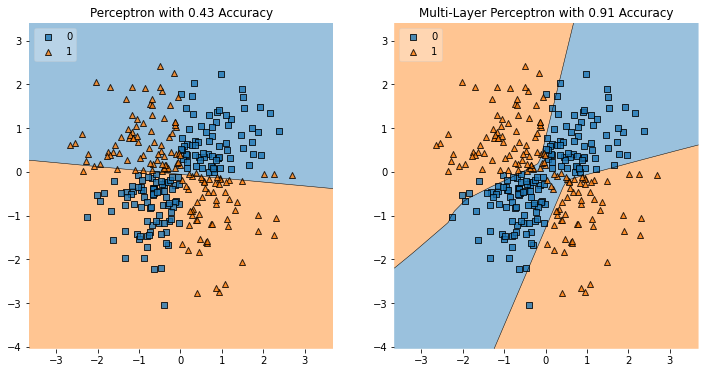

In [ ]:
# 이 셀의 코드는 변경하지 마세요

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

#### 대부분의 Perceptron("model1")의 정확도가 50-70% 정도로 나올 것인데요, 왜 그것밖에 되지 않을까요? <br> 데이터 X와 레이블 y의 관계를 보다 정확하게 학습할 수 있는 다층 퍼셉트론의 구조적인 특징은 무엇일까요? (설명을 하실 때 우리가 배웠었던 특징 추출의 관점에서 설명을 해보시길 바랍니다.)

In [ ]:
# 여기에 답변하시고, Cell을 Markdown으로 변경해서 입력하세요.

```
퍼셉트론 모델은 선형분류만 가능하기 때문에 

위와 같은 비선형 문제는 풀 수가 없는 문제점이 있습니다.  


이러한 복잡한 문제의 경우 퍼셉트론을 다층으로 구성하게 되면 문제를 해결 할 수 있게 됩니다.


(특징추출의 관점에서는 잘 모르겠습니다. 
CNN의 합성곱층 에서 데이터의 특징이 추출된다고 하는데... 이게... 뭔 말인지..)

```

## 3. Keras MLP 튜닝

이번에는 Keras 라이브러리를 사용하여 선택한 MultiLayer Perceptron(MLP) 아키텍처를 구현해보겠습니다. 극히 단순한 모델부터 복잡한 모델까지 만들어 보실 수 있습니다. 모델을 학습하고 정확도를 구해보세요. 
<br> 그런 다음 최소 <b>두 개</b>의 파라미터를 튜닝한 후에 다시 모형의 정확도를 구해보고 이전 모델과 비교해보세요. 
<br> 아래 Cell에서 심장병 데이터 세트를 불러 온 후 이진 분류 모델 (binary classification model) 을 만들어 보세요. 이진 분류 작업에 적절한 손실 함수를 사용하고, 신경망의 마지막 계층에서 적절한 출력값과 활성화 함수를 사용합니다. 
<br> 세부적인 출력을 사용하여 빠르게 수렴할 수 있도록 모델을 학습해보는 것도 중요합니다. GridSearchCV 또는 RandomSearchCV를 사용하여 모델을 하이퍼 파라미터들을 튜닝해봅니다. (최소 두 개의 하이퍼 파라미터를 튜닝해봅니다) 하이퍼 파라미터 튜닝 시 새로운 각 실험에 대해 코드 셀을 추가하여 작업하는 방법을 배워보았는데, 그대로 이용하지 말고 변형을 해서 보여주고 싶은 내용을 정리해서 보여주세요.  
<br> 테스트할 때 하이퍼 파라미터의 각 조합에 대한 정확도를 보고하여 가장 높은 정확도를 얻을 수 있는 결과를 쉽게 확인할 수 있도록 합니다. 
<br> 이 SC에서 **3점**을 얻으려면 **최소 3개의 파라미터**를 조정해야 합니다.

- BatchNormalization을 레이어에 추가하면 성능이 많이 오를 수 있습니다. 
- 하지만 BatchNormalization을 사용하기 위해서는 Batch_size 옵션을 추가해야 합니다.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0


In [ ]:
df.shape

(303, 14)

In [2]:
import numpy
import pandas as pd
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [3]:
# label, data 분리 
y = df['target']
X = df.drop(["target"], axis=1) 

# 훈련, 테스트 셋을 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y  , test_size=0.2, random_state=42 , stratify = y )


In [4]:
X_train.shape

(242, 13)

In [5]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [9]:
numpy.random.seed(42)


def create_model(nodes=8, activation='relu', optimizer = 'adam' ):

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(nodes, activation=activation ,  input_dim=13))
    model.add(tf.keras.layers.BatchNormalization())    
    model.add(tf.keras.layers.Dense(nodes, activation=activation))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer = optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model


model = KerasClassifier(build_fn=create_model, verbose=0)

parameters = {'batch_size': [50, 100],
              'epochs': [200, 300],
              # 'optimizer': ['adam', 'nadam'],
              'nodes' : [16, 32],
              # 'activation':['relu', 'sigmoid'],
              # 'units' : [10, 20, 30],
              # 'learning_rate': [0.01, 0.001, 0.0001]
              }

grid = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=1 )#, cv=3)
grid_result = grid.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [10]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.7932823061943054 using {'batch_size': 50, 'epochs': 300, 'nodes': 16}
Means: 0.7888605475425721, Stdev: 0.04946584224035091 with: {'batch_size': 50, 'epochs': 200, 'nodes': 16}
Means: 0.7355442047119141, Stdev: 0.06315286345123908 with: {'batch_size': 50, 'epochs': 200, 'nodes': 32}
Means: 0.7932823061943054, Stdev: 0.030064546425641003 with: {'batch_size': 50, 'epochs': 300, 'nodes': 16}
Means: 0.7809523820877076, Stdev: 0.04285698578371923 with: {'batch_size': 50, 'epochs': 300, 'nodes': 32}
Means: 0.5079081654548645, Stdev: 0.08752705489303023 with: {'batch_size': 100, 'epochs': 200, 'nodes': 16}
Means: 0.6392006814479828, Stdev: 0.15211575308380773 with: {'batch_size': 100, 'epochs': 200, 'nodes': 32}
Means: 0.6811224460601807, Stdev: 0.1544326289527736 with: {'batch_size': 100, 'epochs': 300, 'nodes': 16}
Means: 0.7602891206741333, Stdev: 0.03590953129913557 with: {'batch_size': 100, 'epochs': 300, 'nodes': 32}


-----

